In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

heart = pd.read_csv("heart_disease_brfss2019.csv")
heart.head()


,HeartDisease,Age,Sex,Education,Income,HighChol,HighBP,BMI,HeavyAlcoholConsump,Smoker,Stroke,Diabetes,PhysicalActivity,Vegetables,Fruits,GenHealth,MenHealth,PhysHealth
0,0.0,13,0,3.0,3.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,15.0
1,0.0,11,0,5.0,5.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,0.0,10.0
2,0.0,10,0,6.0,7.0,0.0,1.0,32.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,30.0,0.0
3,0.0,11,1,6.0,7.0,0.0,0.0,33.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,30.0
4,0.0,11,0,2.0,3.0,1.0,0.0,17.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0,20.0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160840 entries, 0 to 160839
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   HeartDisease         160840 non-null  float64
 1   Age                  160840 non-null  int64  
 2   Sex                  160840 non-null  int64  
 3   Education            160840 non-null  float64
 4   Income               160840 non-null  float64
 5   HighChol             160839 non-null  float64
 6   HighBP               160839 non-null  float64
 7   BMI                  160839 non-null  float64
 8   HeavyAlcoholConsump  160839 non-null  float64
 9   Smoker               160839 non-null  float64
 10  Stroke               160839 non-null  float64
 11  Diabetes             160839 non-null  float64
 12  PhysicalActivity     160839 non-null  float64
 13  Vegetables           160839 non-null  float64
 14  Fruits               160839 non-null  float64
 15  GenHealth        

In [ ]:
heart.describe()

,HeartDisease,Age,Sex,Education,Income,HighChol,HighBP,BMI,HeavyAlcoholConsump,Smoker,Stroke,Diabetes,PhysicalActivity,Vegetables,Fruits,GenHealth,MenHealth,PhysHealth
count,160840.000000,160840.000000,160840.000000,160840.000000,160840.000000,160839.000000,160839.000000,160839.000000,160839.000000,160839.000000,160839.000000,160839.000000,160839.000000,160839.000000,160839.000000,160839.000000,160839.000000,160839.000000
mean,0.088684,7.835296,0.472152,5.066078,6.139822,0.374691,0.414638,28.527347,0.065469,0.136049,0.042968,0.300282,0.754282,0.820796,0.628542,2.547442,3.752989,4.317311
std,0.284289,3.361889,0.499225,0.974790,2.053622,0.484045,0.492661,6.378476,0.247353,0.342842,0.202787,0.698692,0.430513,0.383524,0.483196,1.058034,7.862364,8.754476
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,4.000000,5.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,8.000000,0.000000,5.000000,7.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000
75%,0.000000,10.000000,1.000000,6.000000,8.000000,1.000000,1.000000,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000
max,1.000000,13.000000,1.000000,6.000000,8.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000


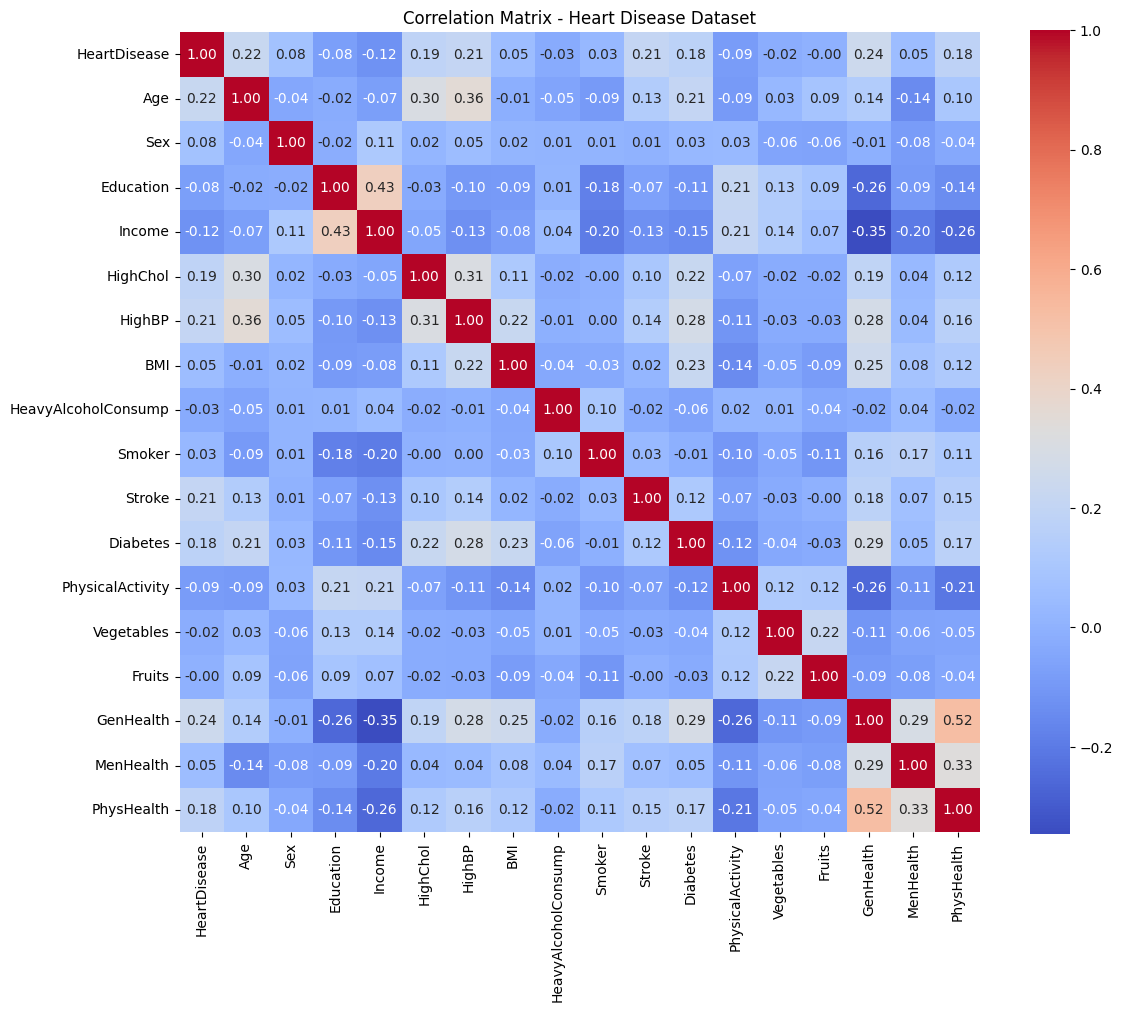

In [ ]:
corr_matrix = heart.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix - Heart Disease Dataset")
plt.tight_layout()
plt.show()


In [ ]:
print(corr_matrix["HeartDisease"].sort_values(ascending=False))


HeartDisease           1.000000
GenHealth              0.243174
Age                    0.222151
HighBP                 0.210444
Stroke                 0.206216
HighChol               0.187523
PhysHealth             0.182643
Diabetes               0.178568
Sex                    0.077637
MenHealth              0.051213
BMI                    0.050238
Smoker                 0.031474
Fruits                -0.002739
Vegetables            -0.018352
HeavyAlcoholConsump   -0.030049
Education             -0.076675
PhysicalActivity      -0.086263
Income                -0.124444
Name: HeartDisease, dtype: float64


In [ ]:
heart = heart.drop(['Income', 'Education', 'PhysicalActivity', 'HeavyAlcoholConsump', 'Vegetables', 'Fruits'], axis=1)


In [ ]:
heart.isna().sum()

,0
HeartDisease,0
Age,0
Sex,0
HighChol,1
HighBP,1
BMI,1
Smoker,1
Stroke,1
Diabetes,1
GenHealth,1


In [ ]:
missing_percentage = heart.isna().sum() / len(heart) * 100
missing_percentage

,0
HeartDisease,0.000000
Age,0.000000
Sex,0.000000
HighChol,0.000622
HighBP,0.000622
BMI,0.000622
Smoker,0.000622
Stroke,0.000622
Diabetes,0.000622
GenHealth,0.000622


In [ ]:
heart= heart.dropna()


In [ ]:
heart["HeartDisease"].value_counts()

,count
HeartDisease,
0.0,146575
1.0,14264


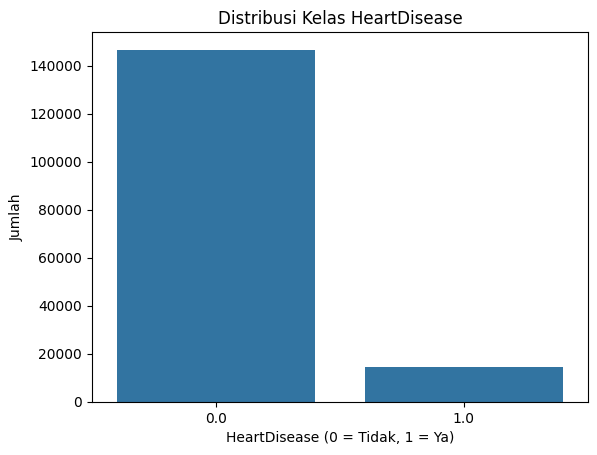

In [142]:
sns.countplot(data=heart, x="HeartDisease")
plt.title("Distribusi Kelas HeartDisease")
plt.xlabel("HeartDisease (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()


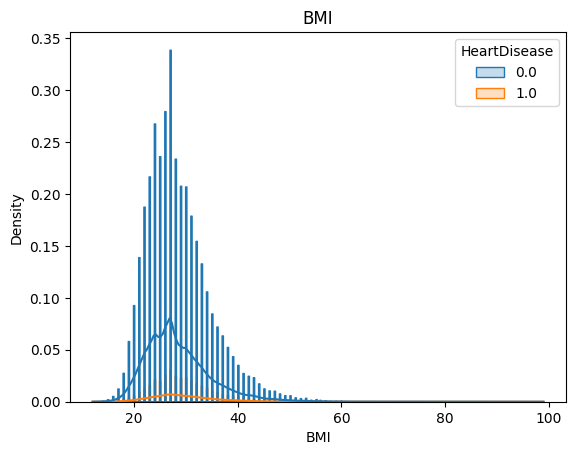

In [4]:
for column in ['BMI']:
    sns.histplot(data=heart, x=column, hue="HeartDisease", kde=True, element="step", stat="density")
    plt.title(f'{column}')
    plt.show()

<h1> Train Model

In [ ]:
X = heart.drop(columns=['HeartDisease'])
y = heart['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Scale hanya fitur kontinu
continuous_features = ['BMI']

X_train_continuous = X_train[continuous_features]
X_train_other = X_train.drop(columns=continuous_features)

X_test_continuous = X_test[continuous_features]
X_test_other = X_test.drop(columns=continuous_features)

scaler = RobustScaler()

X_train_cont_scaled = scaler.fit_transform(X_train_continuous)

X_test_cont_scaled = scaler.transform(X_test_continuous)


X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=continuous_features, index=X_train.index)
X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=continuous_features, index=X_test.index)

X_train_final = pd.concat([X_train_cont_scaled, X_train_other], axis=1)
X_test_final = pd.concat([X_test_cont_scaled, X_test_other], axis=1)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train.reset_index(drop=True))




In [ ]:
joblib.dump(scaler, 'scaler-heart.pkl')


['scaler-heart.pkl']

In [ ]:
from collections import Counter

print("Distribusi kelas sebelum SMOTE:", Counter(y_train))
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))


Distribusi kelas sebelum SMOTE: Counter({0.0: 117275, 1.0: 11396})
Distribusi kelas setelah SMOTE: Counter({0.0: 117275, 1.0: 117275})


<h1> Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier



rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred = rf_model.predict(X_test_final)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

Akurasi: 0.8775
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     29300
         1.0       0.28      0.25      0.26      2868

    accuracy                           0.88     32168
   macro avg       0.61      0.59      0.60     32168
weighted avg       0.87      0.88      0.87     32168



<h1> Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)
y_pred = lr_model.predict(X_test_final)

print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Akurasi: 0.7487
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     29300
         1.0       0.23      0.79      0.36      2868

    accuracy                           0.75     32168
   macro avg       0.60      0.77      0.60     32168
weighted avg       0.91      0.75      0.80     32168



<h1> X-Gboost

In [ ]:
from xgboost import XGBClassifier
# Tidak perlu SMOTE cukup gunakan scale_pos_weight

xgb = XGBClassifier(scale_pos_weight = 10 , random_state=42)  #
xgb.fit(X_train_final, y_train)
y_pred = xgb.predict(X_test_final)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     29300
         1.0       0.24      0.77      0.36      2868

    accuracy                           0.76     32168
   macro avg       0.60      0.76      0.61     32168
weighted avg       0.91      0.76      0.81     32168



In [ ]:
y_proba = xgb.predict_proba(X_test_final)[:, 1]
y_pred_custom = (y_proba > 0.6).astype(int)
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88     29300
         1.0       0.26      0.67      0.38      2868

    accuracy                           0.80     32168
   macro avg       0.61      0.74      0.63     32168
weighted avg       0.90      0.80      0.84     32168



<h1> Save XGB Model

In [ ]:
joblib.dump(xgb, 'xgb_model_heart.pkl')

['xgb_model_heart.pkl']